# Workspaces

Workspaces are used to define the limits on where models can be generated.

In [1]:
import matplotlib.pyplot as plt

from pcg_gazebo import random
from pcg_gazebo.visualization import plot_workspace, plot_shapely_geometry
from pcg_gazebo.generators.constraints import WorkspaceConstraint
from pcg_gazebo.simulation.properties import Pose
from shapely.geometry import MultiPoint

## Polygon from set of points

If a set of points is provided, the convex hull of the points is defined as the workspace.

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70bdfc6a0>)

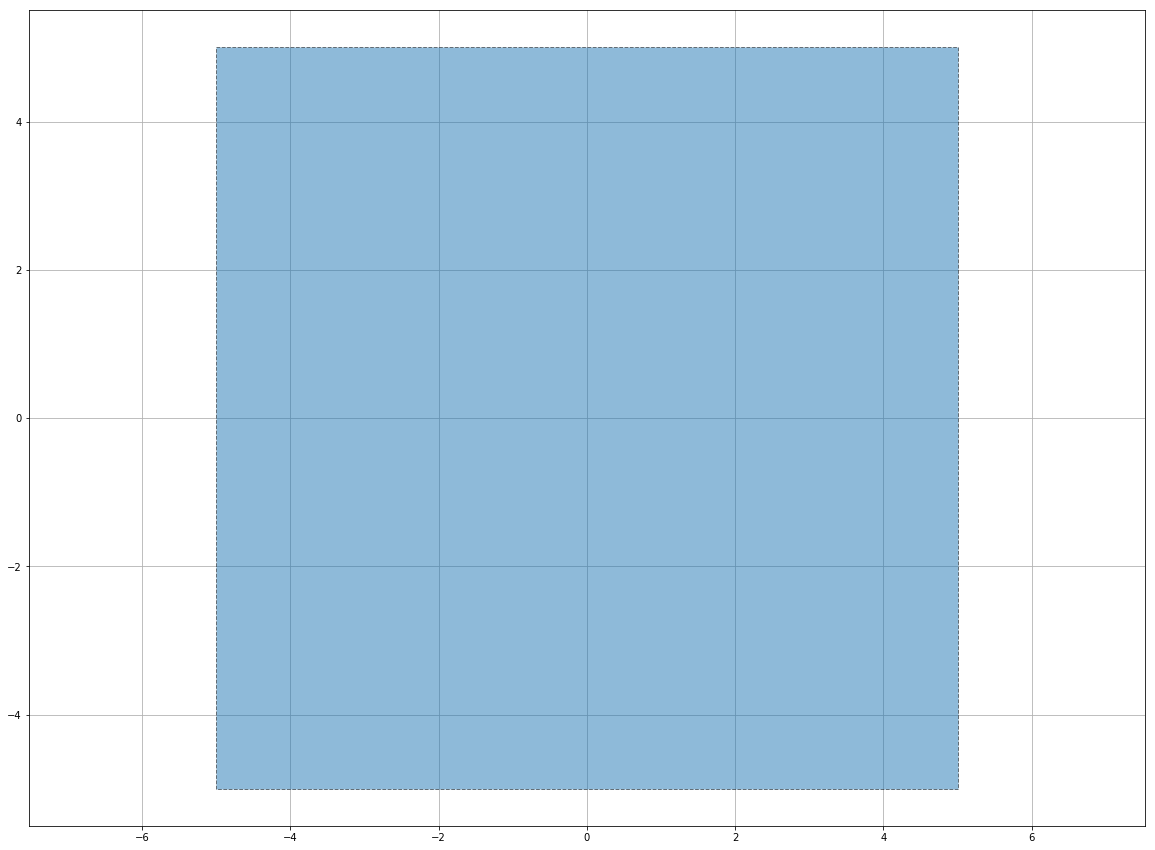

In [2]:
constraint = WorkspaceConstraint(
    geometry_type='area',
    points=[
        [-5, -5],
        [-5, 5],
        [5, -5],
        [5, 5]]
)

plot_workspace(constraint)

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70bdec780>)

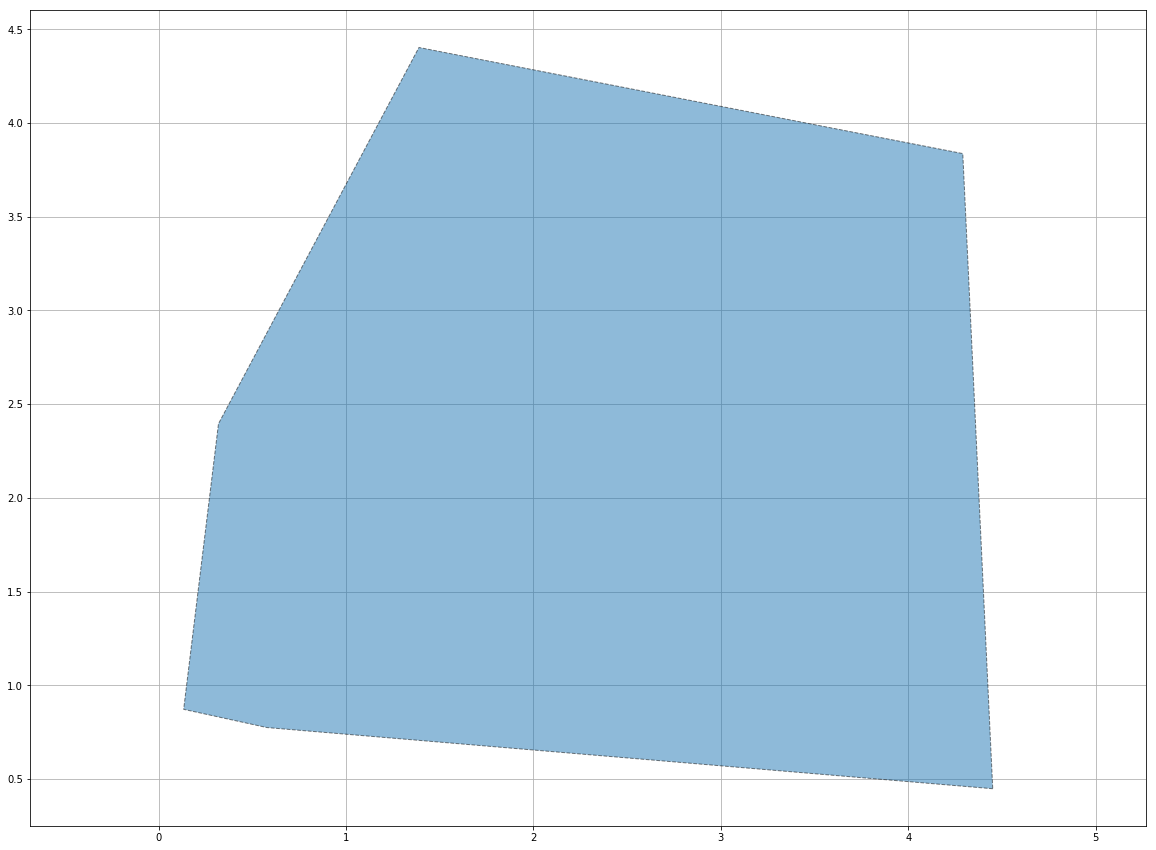

In [3]:
constraint = WorkspaceConstraint(
    geometry_type='area',
    points=[[5 * random.rand(), 5 * random.rand()] for _ in range(10)]
)

plot_workspace(constraint)

### Adding holes to workspace

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70b9a0898>)

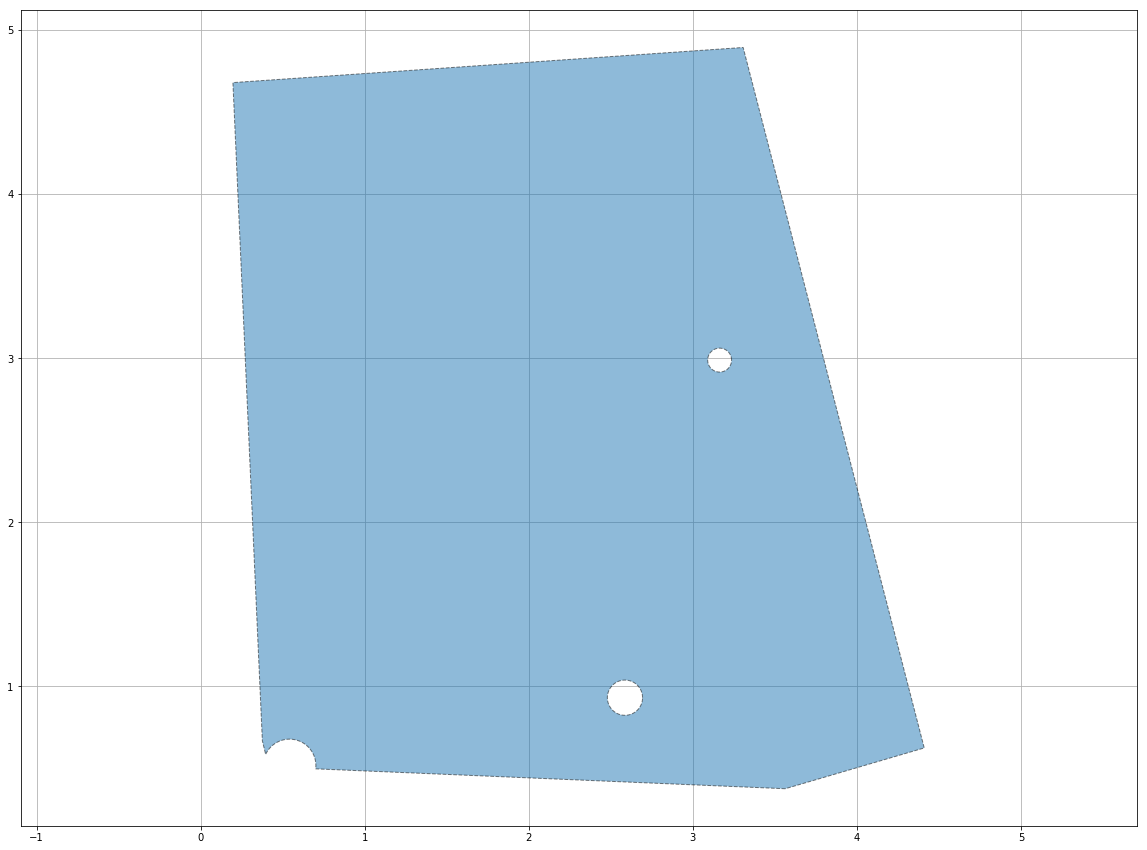

In [4]:
points = [[5 * random.rand(), 5 * random.rand()] for _ in range(10)]

constraint = WorkspaceConstraint(
    geometry_type='area',
    points=points
)

for _ in range(3):
    rnd_point = constraint.get_random_position()

    constraint.add_hole(
        type='circle',
        radius=random.rand() * 0.5,
        center=[rnd_point.xy[0][0], rnd_point.xy[1][0]])

plot_workspace(constraint)

### Selecting a random point from the workspace

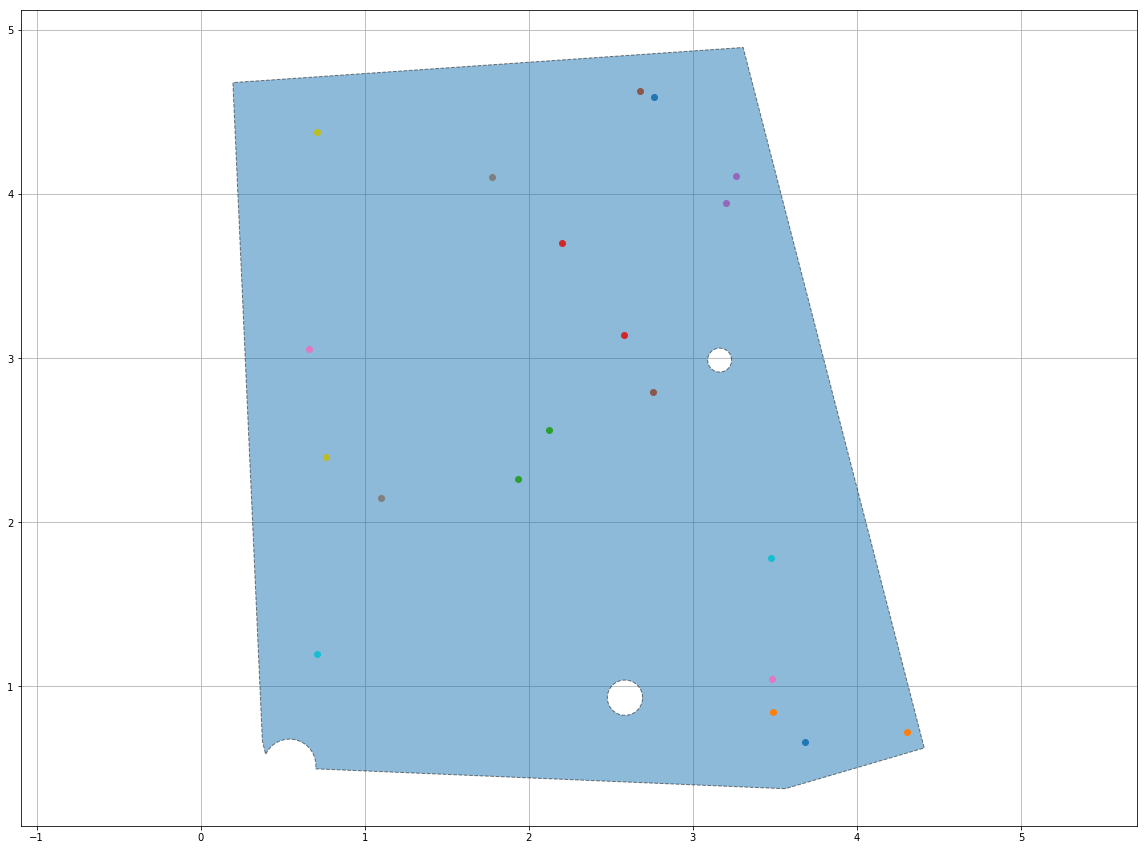

In [5]:
points = [constraint.get_random_position() for _ in range(20)]

fig, ax = plot_workspace(constraint)
plot_shapely_geometry(polygon=MultiPoint(points), fig=fig, ax=ax)

plt.show()

## Circle

By providing a center point and a radius, a circular workspace is generated.

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70b95ca58>)

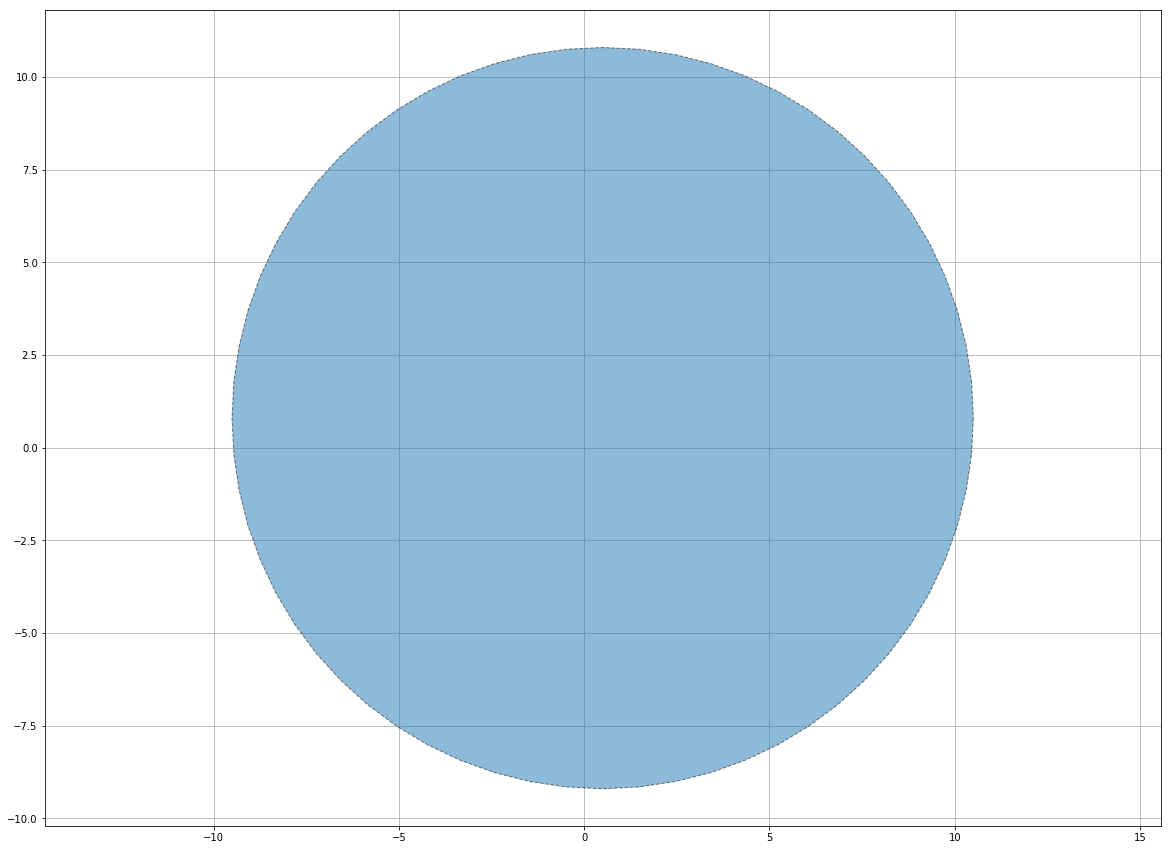

In [6]:
constraint = WorkspaceConstraint(
    geometry_type='circle',
    radius=10,
    center=[0.5, 0.8]
)

plot_workspace(constraint)

### Selecting random points from the circular workspace

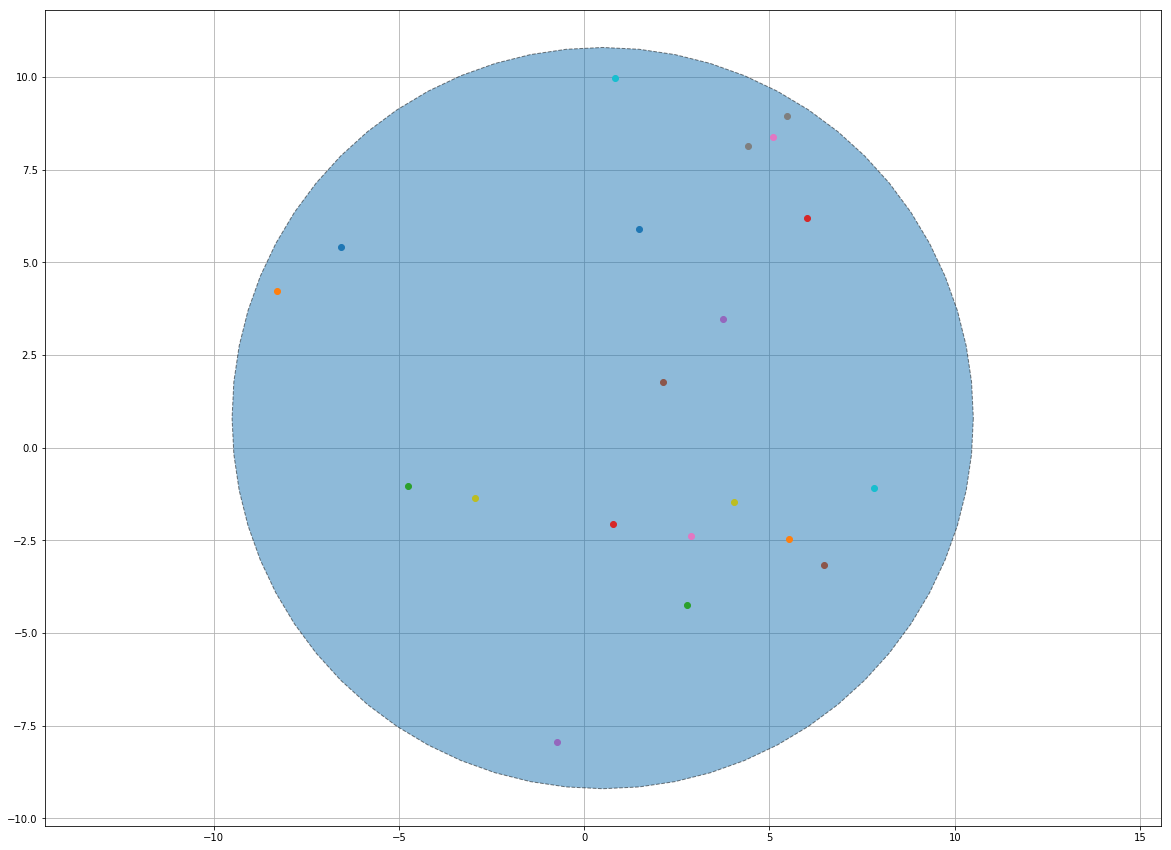

In [7]:
points = [constraint.get_random_position() for _ in range(20)]

fig, ax = plot_workspace(constraint)
plot_shapely_geometry(polygon=MultiPoint(points), fig=fig, ax=ax)

plt.show()

## Multi-point set

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70b85def0>)

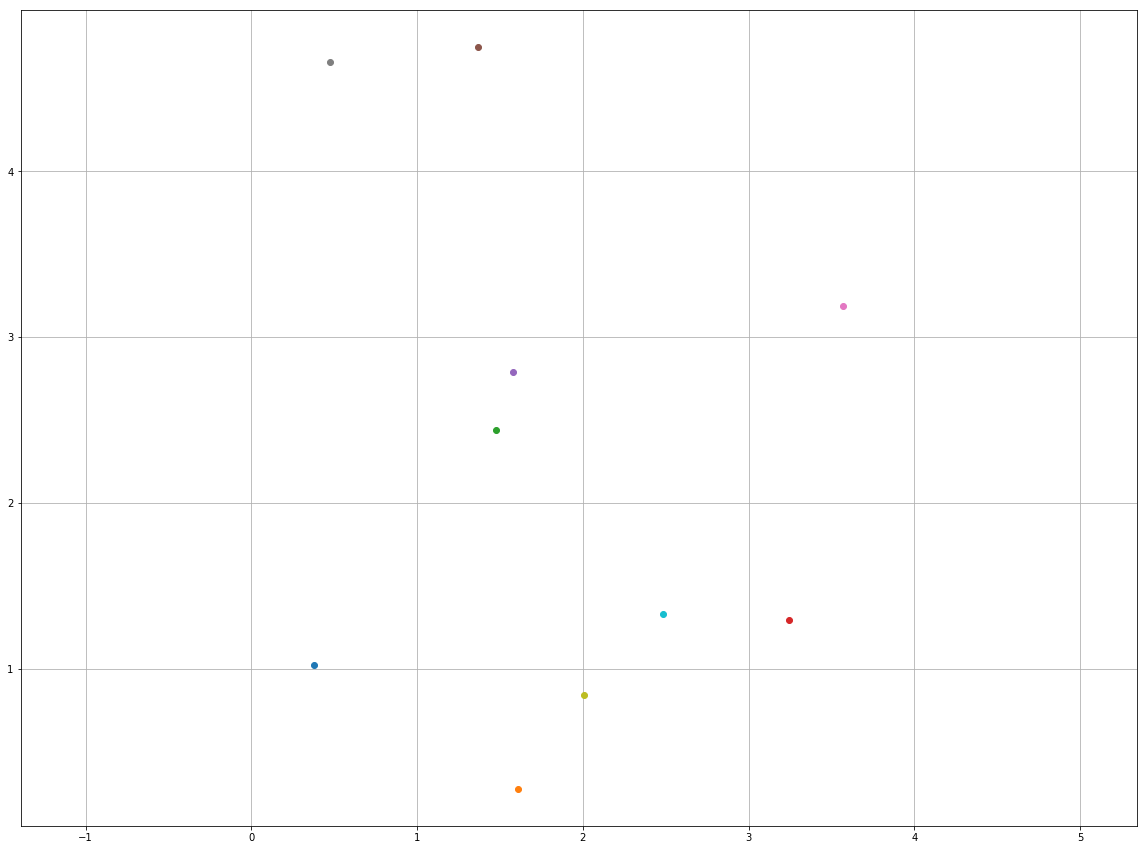

In [8]:
constraint = WorkspaceConstraint(
    geometry_type='multipoint',
    points=[[5 * random.rand(), 5 * random.rand()] for _ in range(10)]
)

plot_workspace(constraint)

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70b7c00f0>)

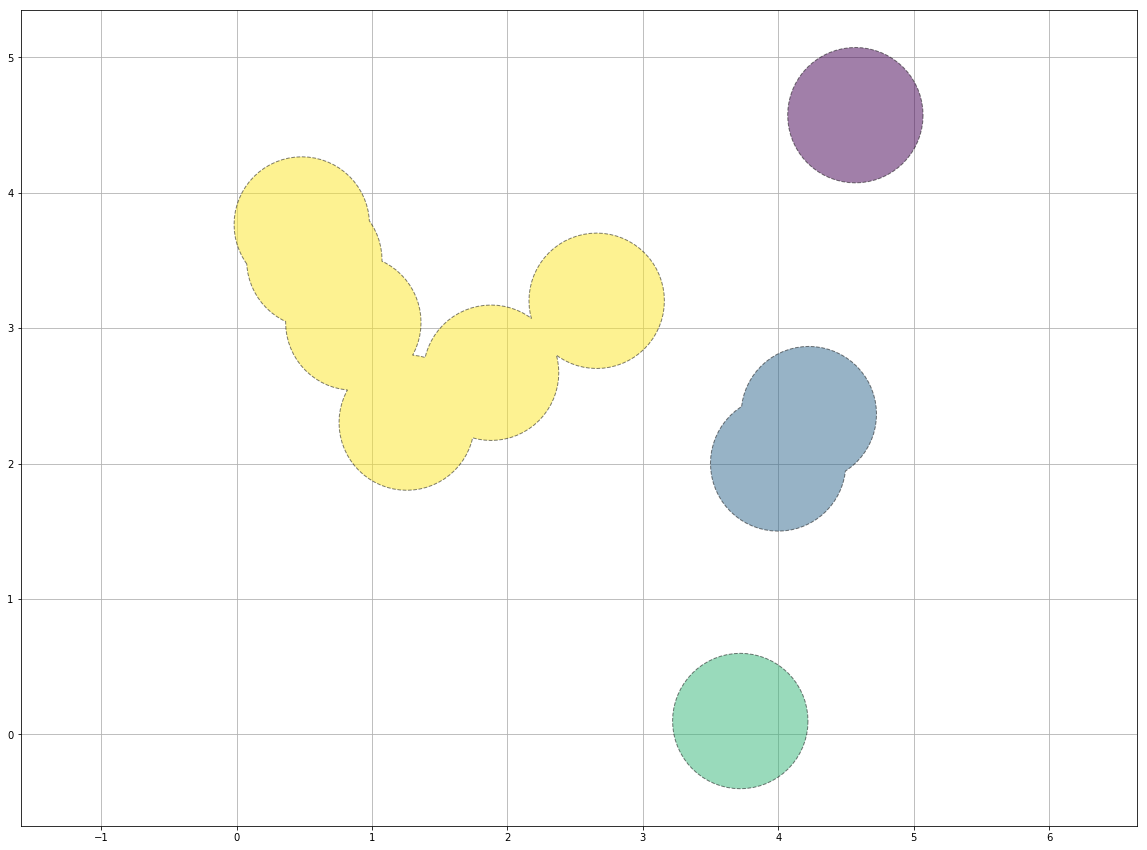

In [9]:
constraint = WorkspaceConstraint(
    geometry_type='multipoint',
    points=[[5 * random.rand(), 5 * random.rand()] for _ in range(10)],
    buffer=0.5
)

plot_workspace(constraint)

### Selecting random points from the multipoint workspace

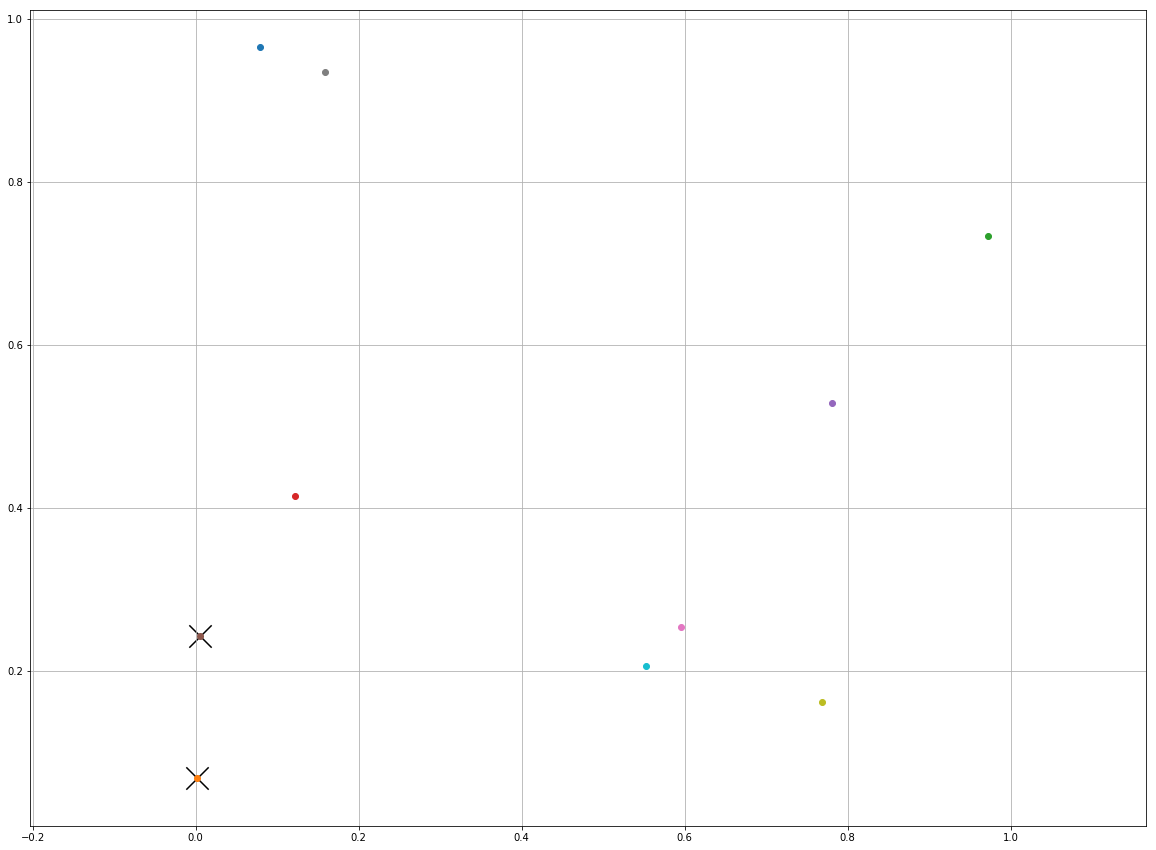

In [10]:
constraint = WorkspaceConstraint(
    geometry_type='multipoint',
    points=[[random.rand(), random.rand()] for _ in range(10)]
)

fig, ax = plot_workspace(constraint)

points = list()
for _ in range(2):
    points.append(constraint.get_random_position())
ax.scatter([pnt.xy[0] for pnt in points], [pnt.xy[1] for pnt in points], s=500, c='black', marker='x')

## Lines

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70b757b70>)

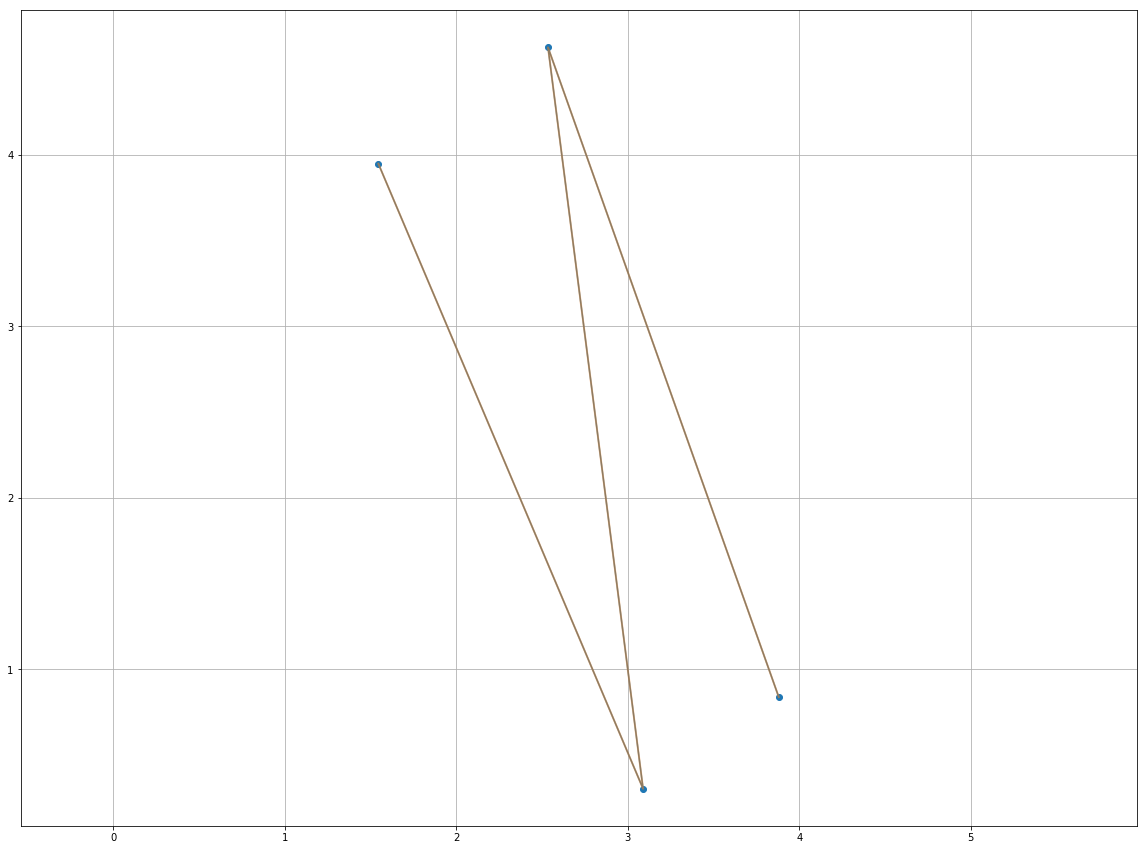

In [11]:
constraint = WorkspaceConstraint(
    geometry_type='line',
    points=[[5 * random.rand(), 5 * random.rand()] for _ in range(4)]
)

plot_workspace(constraint)

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70b70be10>)

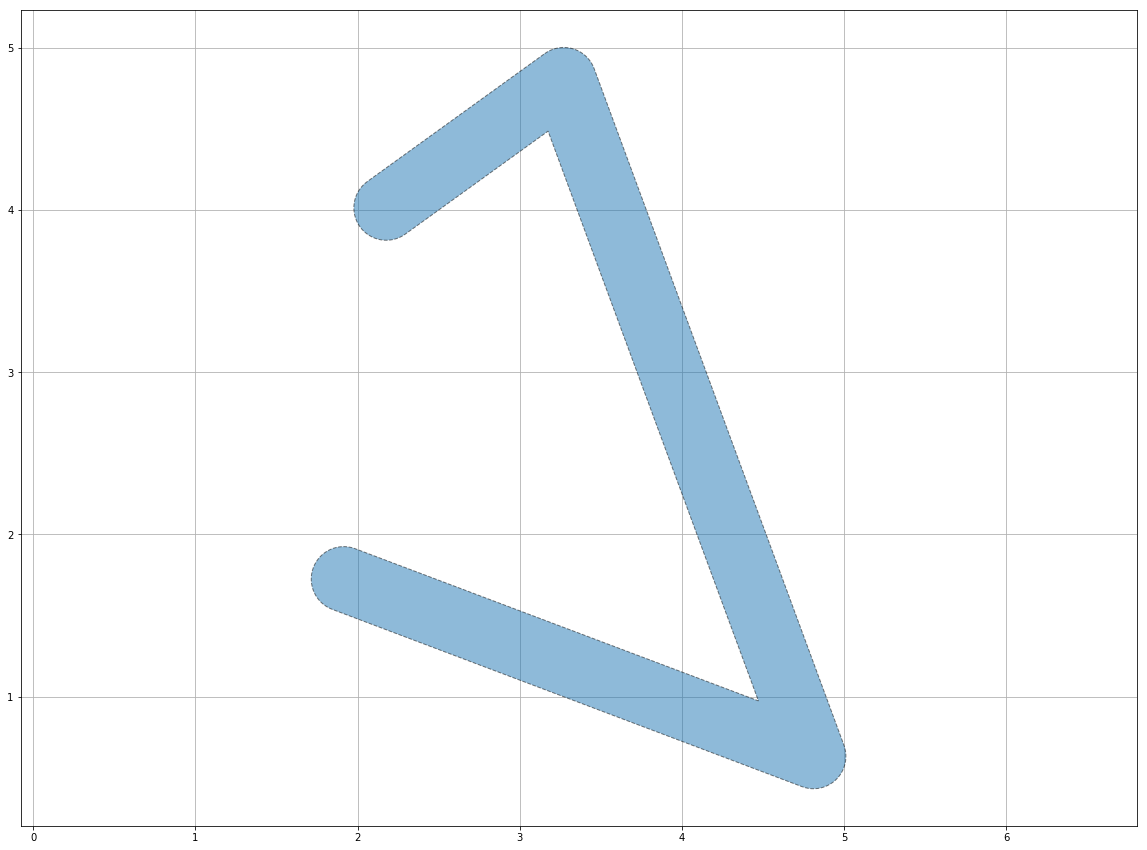

In [12]:
constraint = WorkspaceConstraint(
    geometry_type='line',
    points=[[5 * random.rand(), 5 * random.rand()] for _ in range(4)],
    buffer=0.2
)

plot_workspace(constraint)

### Selecting random points from the line workspace

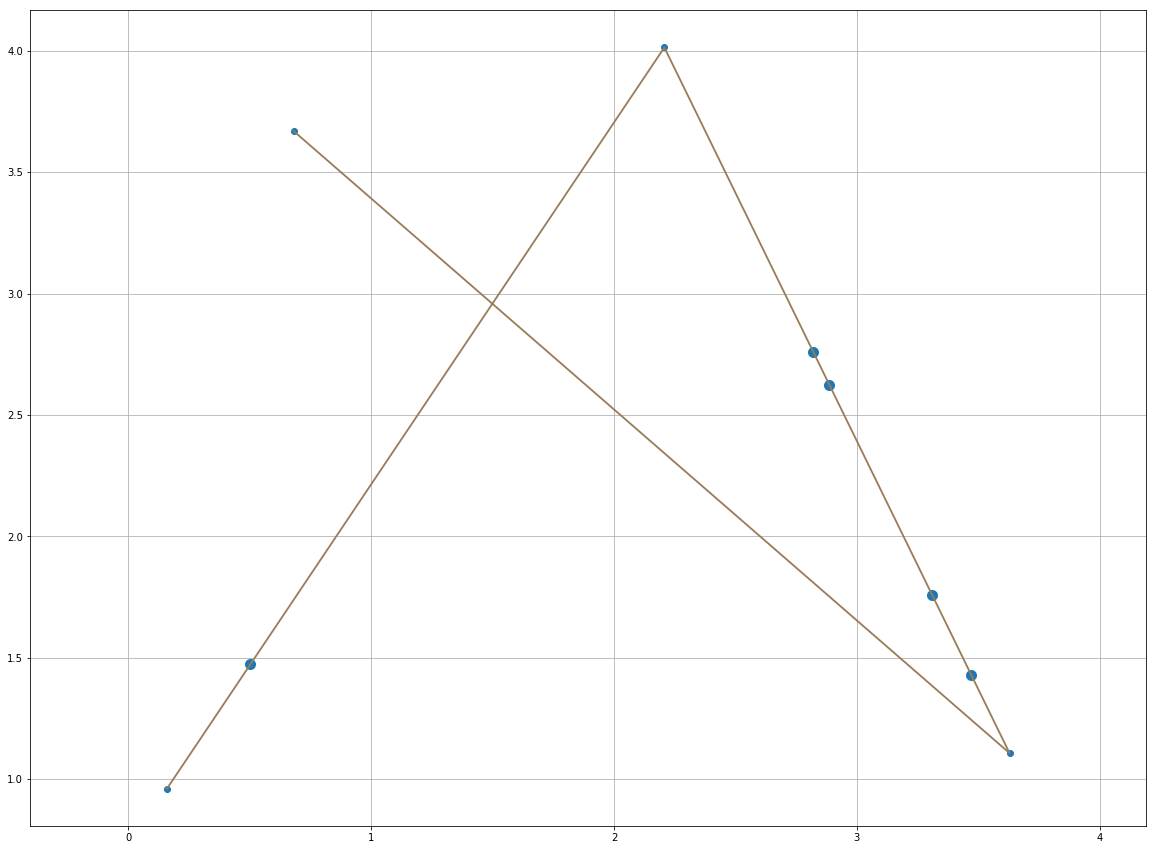

In [13]:
constraint = WorkspaceConstraint(
    geometry_type='line',
    points=[[5 * random.rand(), 5 * random.rand()] for _ in range(4)]
)

fig, ax = plot_workspace(constraint)

points = list()
for _ in range(5):
    points.append(constraint.get_random_position())
ax.scatter([pnt.xy[0] for pnt in points], [pnt.xy[1] for pnt in points], s=100)

## Multiline workspace

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70b69b0f0>)

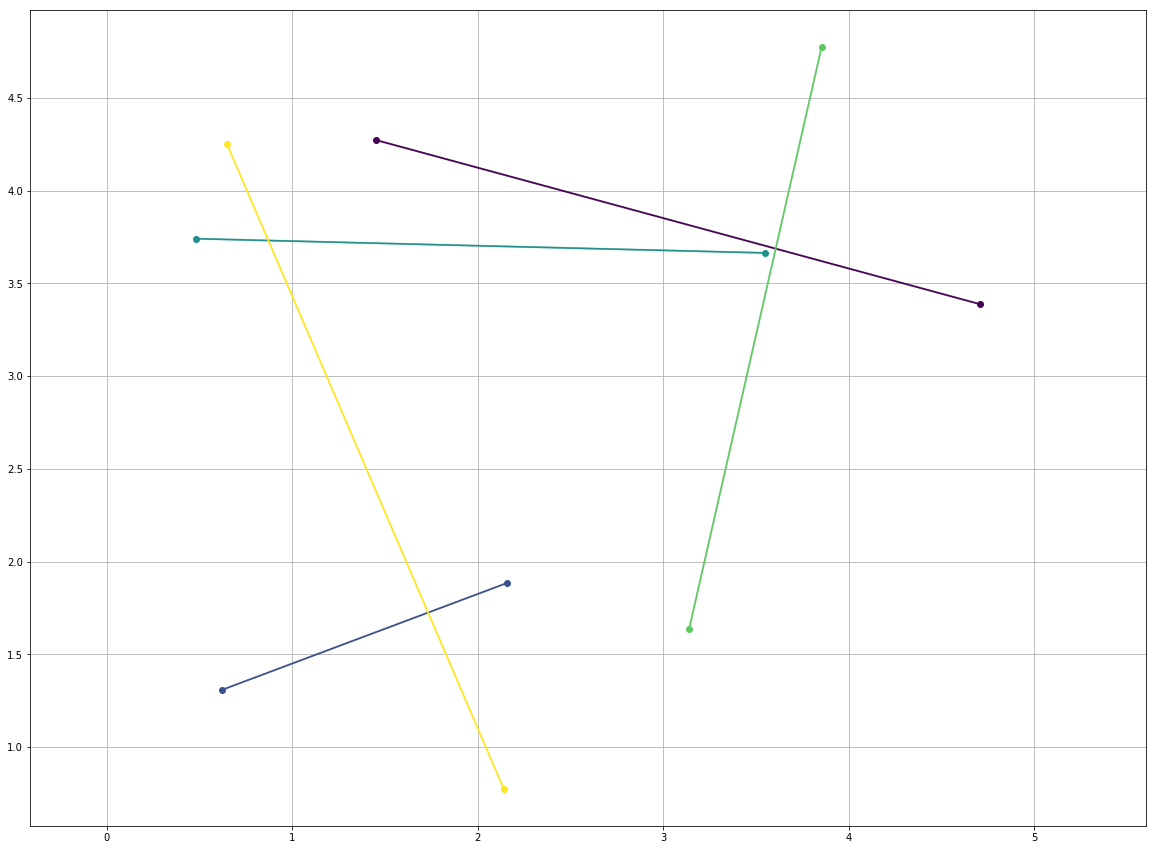

In [14]:
lines = list()
for _ in range(5):
    line = list()
    for _ in range(2):
        line.append([5 * random.rand(), 5 * random.rand()])
    lines.append(line)

constraint = WorkspaceConstraint(
    geometry_type='multiline',
    lines=lines
)

plot_workspace(constraint)

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd70b6795f8>)

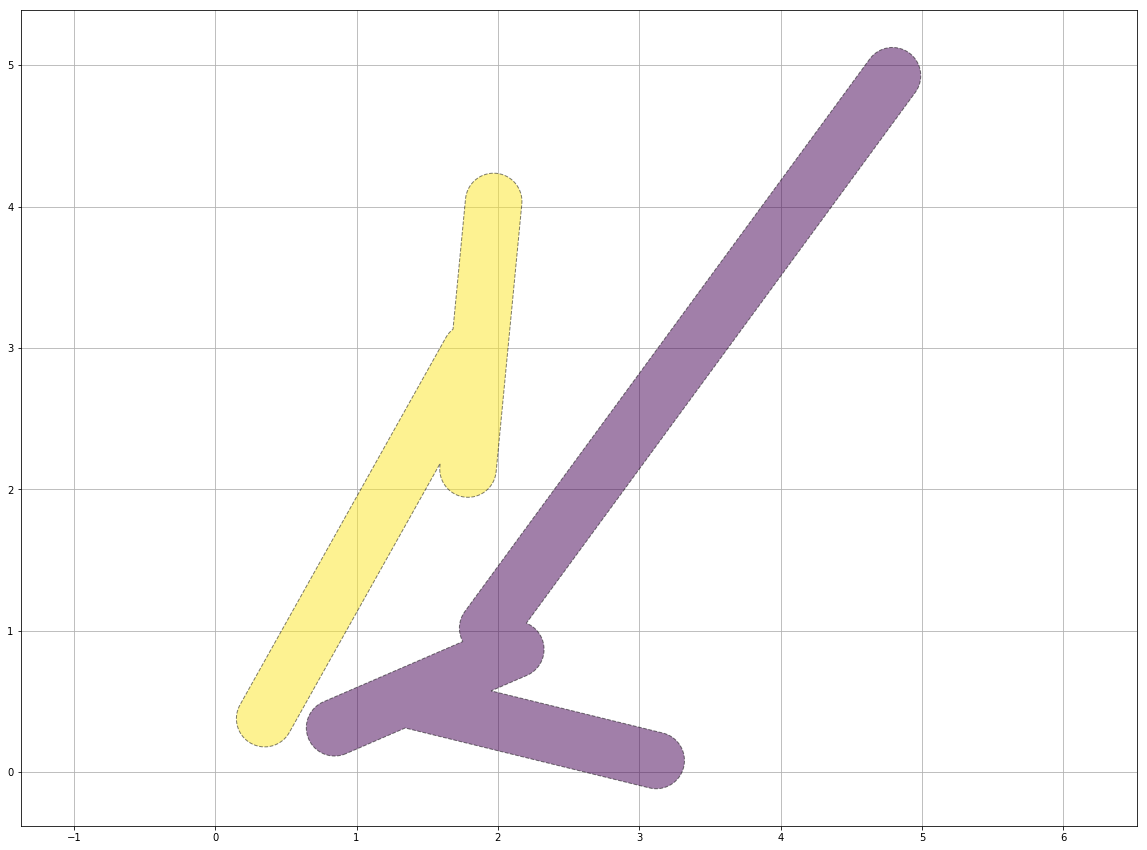

In [15]:
lines = list()
for _ in range(5):
    line = list()
    for _ in range(2):
        line.append([5 * random.rand(), 5 * random.rand()])
    lines.append(line)

constraint = WorkspaceConstraint(
    geometry_type='multiline',
    lines=lines,
    buffer=0.2
)

plot_workspace(constraint)

### Selecting random points from the multiline workspace

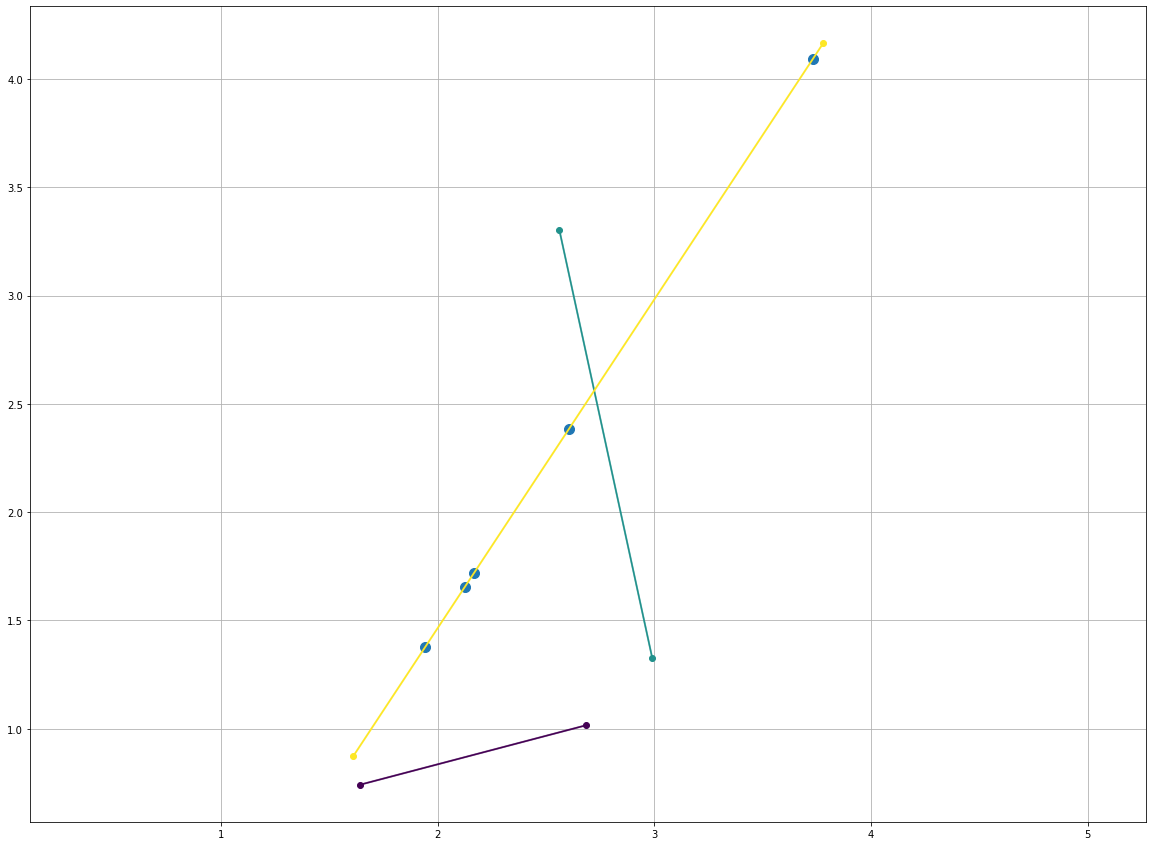

In [16]:
lines = list()
for _ in range(3):
    line = list()
    for _ in range(2):
        line.append([5 * random.rand(), 5 * random.rand()])
    lines.append(line)

constraint = WorkspaceConstraint(
    geometry_type='multiline',
    lines=lines
)

fig, ax = plot_workspace(constraint)

points = list()
for _ in range(5):
    points.append(constraint.get_random_position())
ax.scatter([pnt.xy[0] for pnt in points], [pnt.xy[1] for pnt in points], s=100)

### Selecting random points from the multipolygon workspace

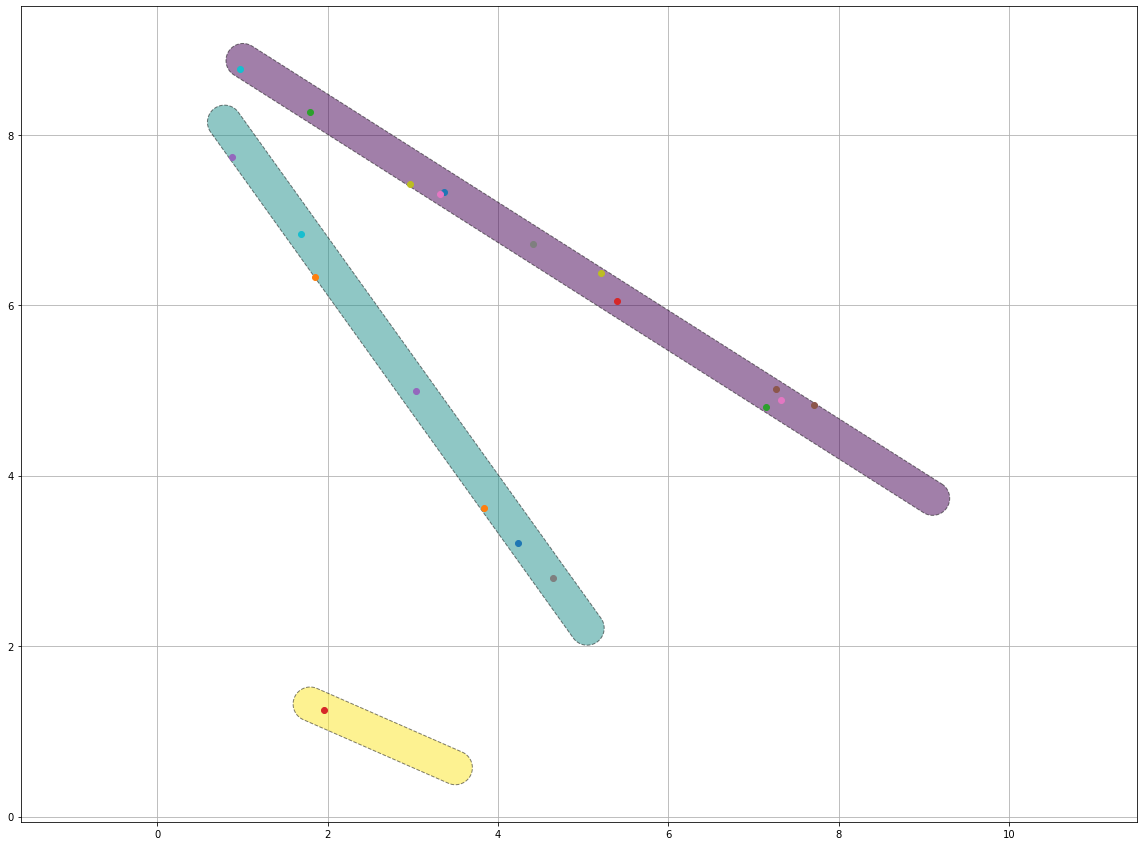

In [17]:
lines = list()
for _ in range(3):
    line = list()
    for _ in range(2):
        line.append([10 * random.rand(), 10 * random.rand()])
    lines.append(line)

constraint = WorkspaceConstraint(
    geometry_type='multiline',
    lines=lines,
    buffer=0.2
)

points = [constraint.get_random_position() for _ in range(20)]

fig, ax = plot_workspace(constraint)
plot_shapely_geometry(polygon=MultiPoint(points), fig=fig, ax=ax)

plt.show()

# Box

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f633cc5fb00>)

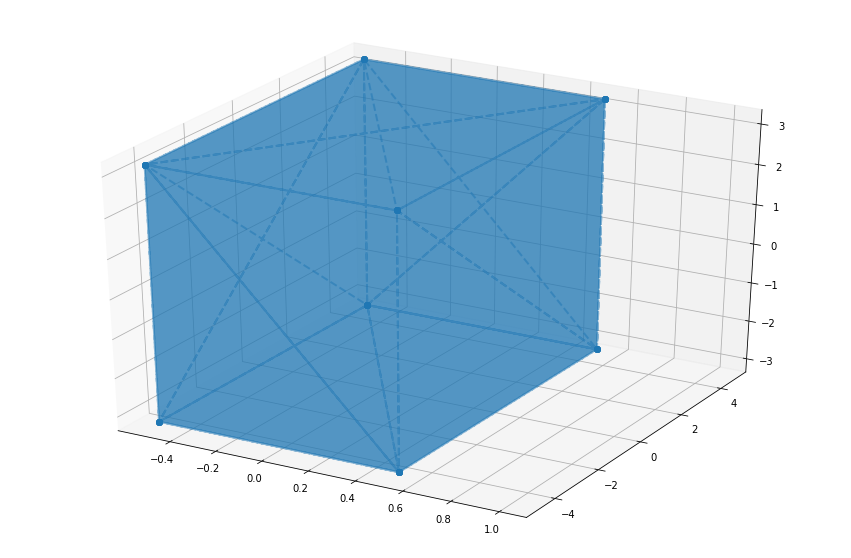

In [18]:
constraint = WorkspaceConstraint(
    geometry_type='box',
    size=random.rand(3) * 10
)

plot_workspace(constraint)

### Setting a pose to the 3D workspace

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f633cb902e8>)

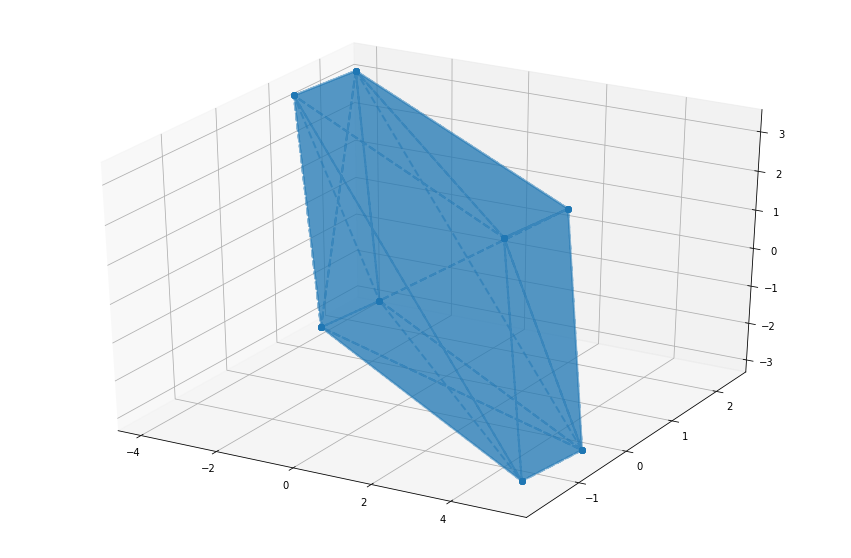

In [19]:
constraint.pose = Pose.random()
plot_workspace(constraint)

### Selecting random points from the box workspace

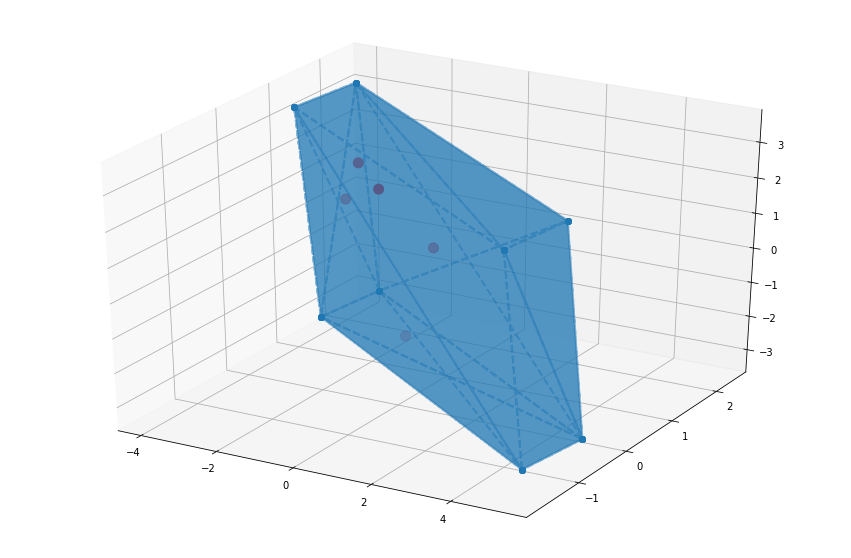

In [20]:
points = [constraint.get_random_position() for _ in range(5)]
fig, ax = plot_workspace(constraint)

ax.scatter([p.coords[0][0] for p in points], [p.coords[0][1] for p in points], [p.coords[0][2] for p in points], s=100, color='red')

# Sphere

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f633caa1e10>)

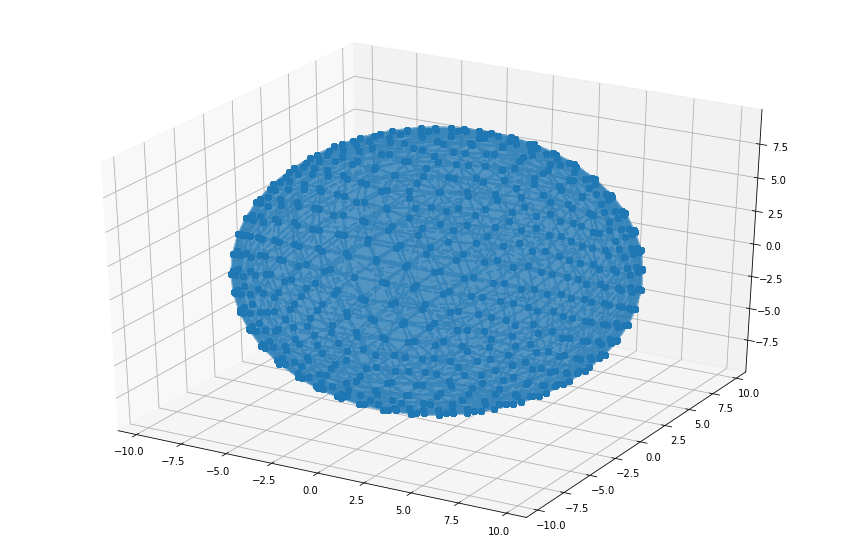

In [21]:
constraint = WorkspaceConstraint(
    geometry_type='sphere',
    radius=random.rand() * 10
)

plot_workspace(constraint)

### Setting a pose to the 3D workspace

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f633ca80be0>)

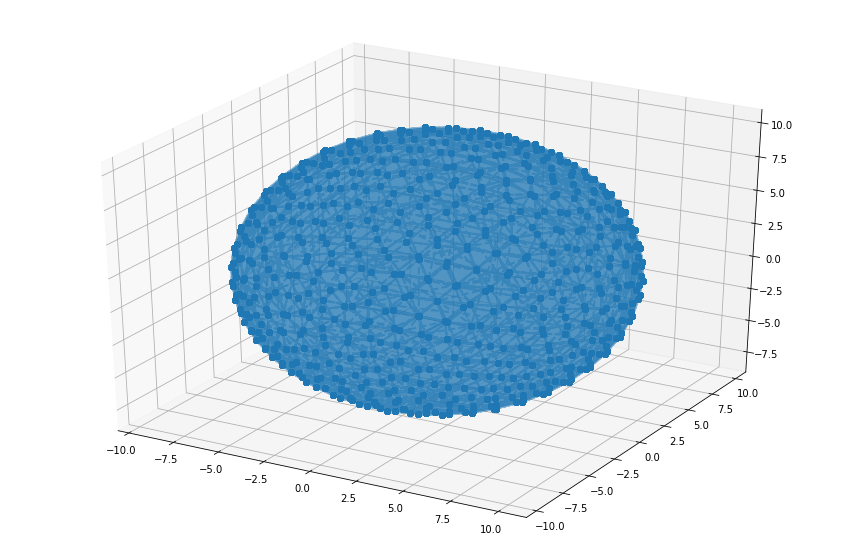

In [22]:
constraint.pose = Pose.random()
plot_workspace(constraint)

### Selecting random points from the sphere workspace

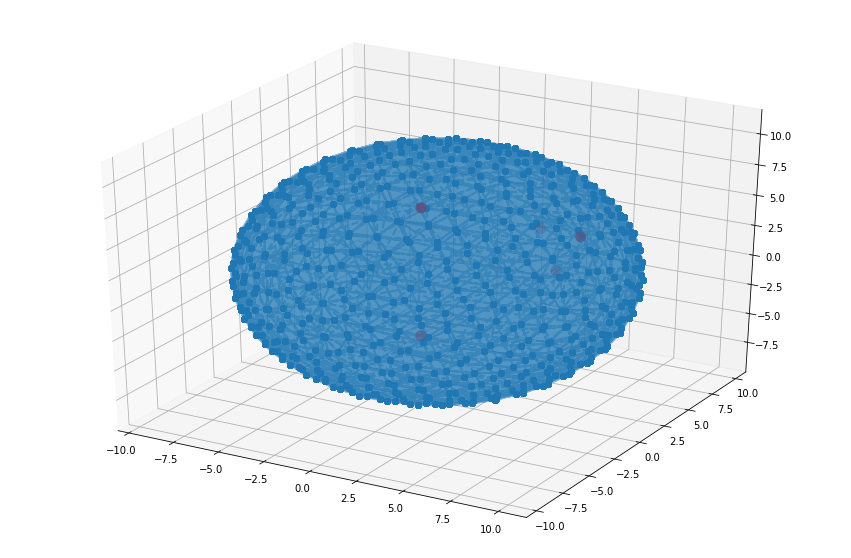

In [23]:
points = [constraint.get_random_position() for _ in range(5)]
fig, ax = plot_workspace(constraint)

ax.scatter([p.coords[0][0] for p in points], [p.coords[0][1] for p in points], [p.coords[0][2] for p in points], s=100, color='red')

## Cylinder

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f634010aa20>)

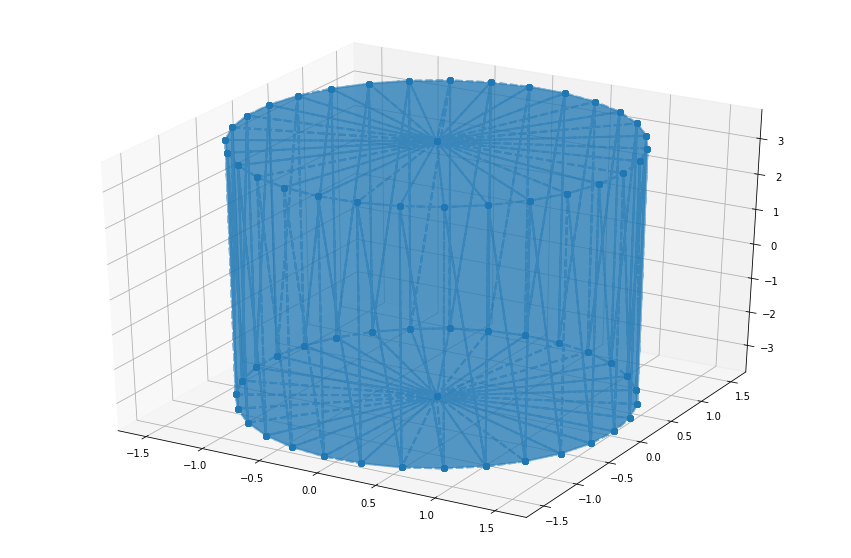

In [24]:
constraint = WorkspaceConstraint(
    geometry_type='cylinder',
    radius=random.rand() * 10,
    length=random.rand() * 10
)

plot_workspace(constraint)

### Setting a pose to the 3D workspace

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f633c5886a0>)

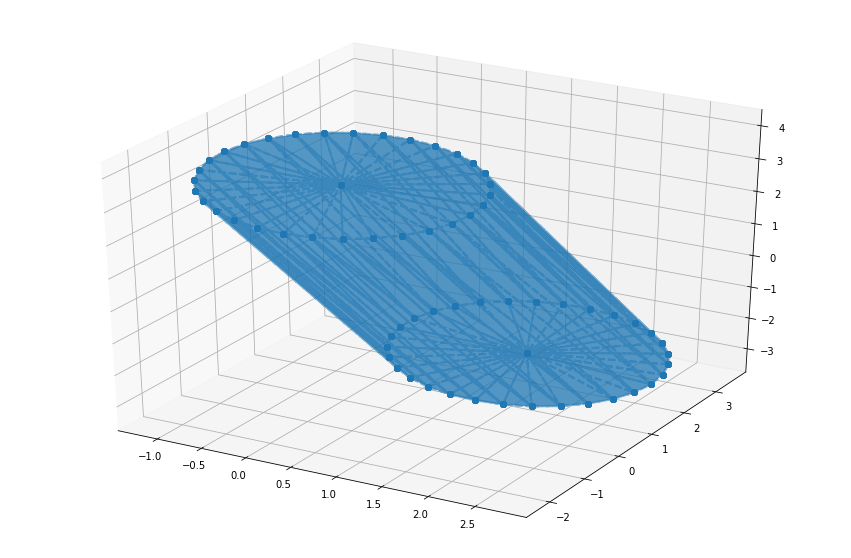

In [25]:
constraint.pose = Pose.random()
plot_workspace(constraint)

### Selecting random points from the cylindrical workspace

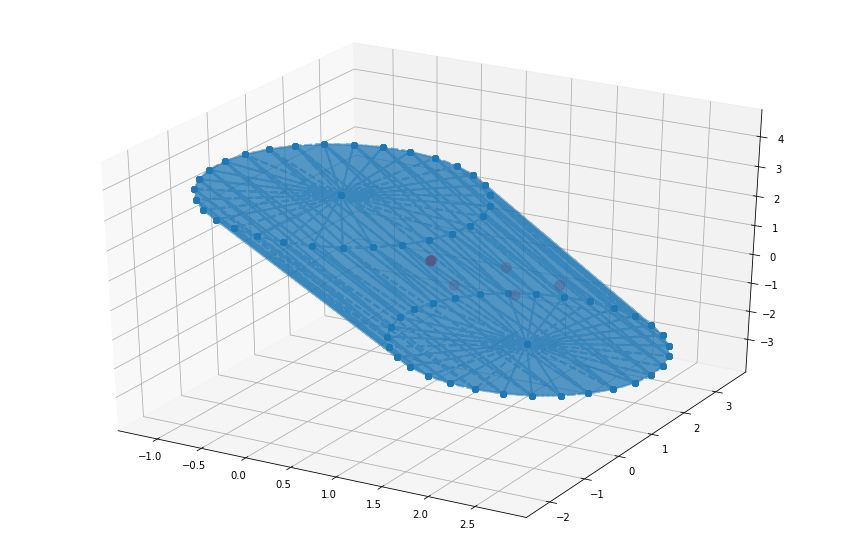

In [26]:
points = [constraint.get_random_position() for _ in range(5)]
fig, ax = plot_workspace(constraint)

ax.scatter([p.coords[0][0] for p in points], [p.coords[0][1] for p in points], [p.coords[0][2] for p in points], s=100, color='red')